###### nooman

In [20]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

pd.set_option('display.max_columns', None)

load the data set which we engineered in previous notebook

In [21]:
x_train = pd.read_csv('/home/nooman/xTrain.csv')
x_test = pd.read_csv('/home/nooman/xTest.csv')
y_train = pd.read_csv("/home/nooman/yTrain.csv")
y_test = pd.read_csv('/home/nooman/yTest.csv')

In [22]:
x_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,LotFrontage_na,MasVnrArea_na,GarageYrBlt_na
0,0.333333,0.75,0.521833,0.416407,1.0,1.0,0.333333,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,0.0,0.666667,0.750,0.514706,0.327869,0.0,0.0,0.8,0.8,0.333333,0.0,0.666667,0.50,0.50,0.666667,0.666667,0.000000,0.4,0.039511,0.0,0.0,0.339897,0.166448,1.0,0.75,1.0,1.000000,0.422489,0.502179,0.0,0.643070,0.000000,0.0,0.333333,0.5,0.375,0.333333,0.666667,0.333333,1.0,0.333333,0.8,0.75,0.654206,1.0,0.25,0.126939,0.25,0.50,1.0,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0,0.00,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
1,0.750000,0.75,0.429425,0.484259,1.0,1.0,1.000000,0.333333,1.0,0.25,0.0,0.681818,0.4,1.0,0.75,0.6,0.666667,0.500,0.058824,0.131148,0.0,0.0,0.9,0.9,0.333333,0.0,0.666667,0.50,1.00,0.666667,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.604880,0.231260,1.0,1.00,1.0,1.000000,0.550351,0.000000,0.0,0.514455,0.000000,0.0,0.666667,0.0,0.375,0.333333,0.666667,0.333333,1.0,0.000000,0.0,0.75,0.074766,0.5,0.50,0.426657,0.50,0.50,1.0,0.000000,0.060329,0.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.454545,0.666667,0.75,0.0,0.0,0.0
2,0.500000,0.75,0.388581,0.325689,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.681818,0.4,1.0,0.75,0.2,0.444444,0.875,0.272059,0.114754,0.0,0.0,0.2,0.5,0.333333,0.0,0.333333,0.75,0.50,0.666667,0.666667,0.666667,1.0,0.116938,0.0,0.0,0.046233,0.125696,1.0,0.75,1.0,1.000000,0.315102,0.000000,0.0,0.294550,0.000000,0.5,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,0.0,0.25,0.327103,1.0,0.25,0.279267,0.50,0.50,1.0,0.224037,0.000000,0.0,0.0,0.0,0.0,0.0,0.75,1.0,0.0,0.272727,0.666667,0.75,0.0,0.0,0.0
3,0.000000,0.75,0.282098,0.351944,1.0,0.0,0.000000,0.333333,1.0,0.25,0.0,0.181818,0.4,1.0,0.75,0.6,0.222222,0.250,0.691176,0.967213,0.0,0.0,0.5,0.2,0.333333,0.0,0.333333,0.50,0.25,0.333333,0.666667,0.000000,0.6,0.007264,0.0,0.0,0.352312,0.141408,1.0,0.50,0.0,0.333333,0.359675,0.000000,0.0,0.336216,0.333333,0.0,0.333333,0.0,0.250,0.333333,0.333333,0.250000,1.0,0.000000,0.0,0.75,0.261682,0.0,0.00,0.000000,0.50,0.50,0.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.727273,0.666667,0.75,0.0,0.0,1.0
4,0.000000,0.75,0.495064,0.418091,1.0,1.0,0.000000,0.333333,1.0,0.25,0.0,0.727273,0.4,1.0,0.75,0.6,0.333333,0.500,0.617647,0.934426,0.0,0.0,0.4,0.3,0.333333,0.0,0.333333,0.50,0.25,0.000000,0.666667,0.000000,0.0,0.000000,0.0,0.0,0.299658,0.114566,1.0,1.00,1.0,1.000000,0.477632,0.000000,0.0,0.446478,0.000000,0.0,0.333333,0.0,0.250,0.333333,0.000000,0.250000,1.0,0.333333,0.8,0.25,0.785047,0.0,0.25,0.177715,0.50,0.25,1.0,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.00,1.0,0.0,0.545455,0.666667,0.75,0.0,0.0,0.0


In [23]:
y_train.head()

,SalePrice
0,12.429216
1,12.139399
2,11.804849
3,11.112448
4,11.831379


### Feature Selections

In [24]:
# We will do the model fitting and feature selection
# altogether in a few lines of code

# first, we specify the Lasso Regression model, and we
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then we use the selectFromModel object from sklearn, which
# will select automatically the features which coefficients are non-zero

# remember to set the seed, the random state in this function

sel_ = SelectFromModel(Lasso(alpha=0.001, random_state=0))

sel_.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [26]:
sel_.get_support().sum()

38

In [27]:
sel_.get_support()

array([ True,  True, False,  True, False, False, False,  True, False,
        True, False,  True,  True, False, False, False,  True,  True,
       False,  True,  True, False,  True, False, False, False,  True,
       False,  True,  True, False,  True,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True, False, False,  True,  True,  True, False,
       False,  True,  True, False, False, False,  True, False, False,
       False, False, False, False,  True,  True, False, False, False])

In [36]:
selected_fetures = x_train.columns[(sel_.get_support())]

In [40]:
print("Total Features: ", x_train.shape[1])
print("Select Features: ", len(selected_fetures))
print("Feture with truncate zero: ", np.sum(sel_.estimator_.coef_ == 0))

Total Features:  81
Select Features:  38
Feture with truncate zero:  43


In [42]:
pd.Series(selected_fetures).to_csv("selected_features.csv", index=False)

### Model Trainings

In [46]:
x_train = x_train[selected_fetures]
x_test = x_test[selected_fetures]

### Reguralization regression Lasso

In [48]:
linear_model = Lasso(alpha=0.001, random_state=0)

linear_model.fit(x_train, y_train)

Lasso(alpha=0.001, random_state=0)

In [56]:
## Evaluate the model
from sklearn import metrics
y_pred_train = linear_model.predict(x_train)
print("Train MSE: " , metrics.mean_squared_error(y_pred_train, y_train))
print("Train R2 Score: ", metrics.r2_score(y_pred_train, y_train))

print()

y_pred_test = linear_model.predict(x_test)
print("Test MSE: " , metrics.mean_squared_error(y_pred_test, y_test))
print("Test R2 Score: ", metrics.r2_score(y_pred_test, y_test))

Train MSE:  0.01583386418471507
Train R2 Score:  0.8802101309274579

Test MSE:  0.013328712954351413
Test R2 Score:  0.9182614562561389


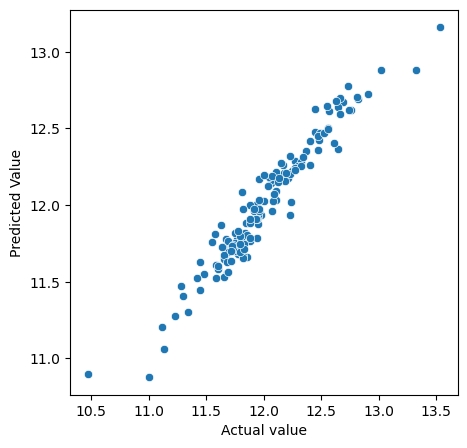

In [65]:
plt.figure(figsize=(5, 5))
sns.scatterplot(x=y_test.values.flatten(), y=y_pred_test.flatten())
plt.xlabel("Actual value")
plt.ylabel("Predicted Value")
plt.show()

In [74]:
import warnings
warnings.filterwarnings('ignore')

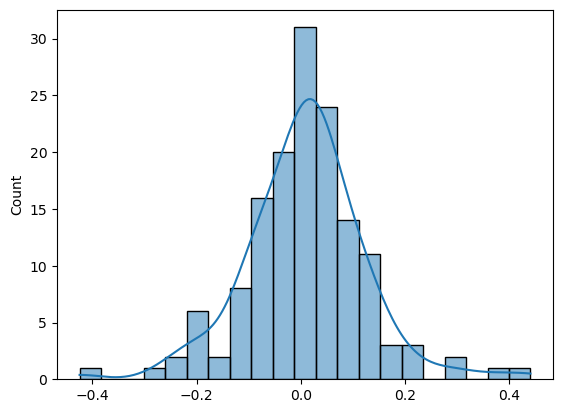

In [75]:
### let's find the evolution of error they should be normally distributed
sns.histplot(y_test.values.flatten()  - y_pred_test, kde=True)
plt.show()

Now we can see that our error is normally distributed

### Feature Importance

In [79]:
features = pd.Series(np.abs(linear_model.coef_))
features.index = x_train.columns

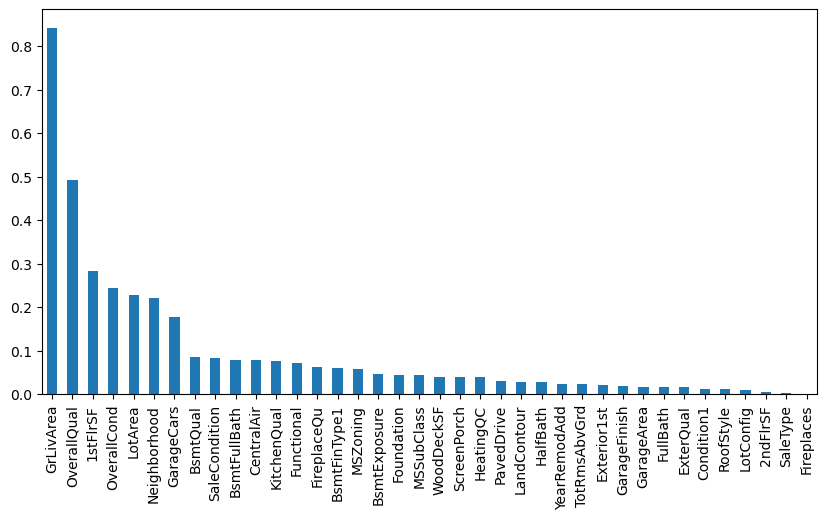

In [87]:
plt.figure(figsize=(10, 5))
features.sort_values(ascending=False).plot(kind="bar")
plt.show()

In [88]:
import joblib
joblib.dump(linear_model, 'linear_regression.joblib')

['linear_regression.joblib']